In [2]:
pip install plotly

   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB 325.1 kB/s eta 0:00:49
   ---------------------------------------- 0.1/15.7 MB 465.5 kB/s eta 0:00:34
    --------------------------------------- 0.3/15.7 MB 1.5 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/15.7 MB 3.6 MB/s eta 0:00:05
   -- ------------------------------------- 1.0/15.7 MB 3.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.2/15.7 MB 3.6 MB/s eta 0:00:05
   --- ------------------------------------ 1.2/15.7 MB 3.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.2/15.7 MB 3.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.3/15.7 MB 2.8 MB/s eta 0:00:06
   --- ------------------------------------ 1.5/15.7 MB 2.9 MB/s eta 0:00:05
   --- ---------

In [3]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [4]:
data = pd.read_csv("Instagram-Reach.csv", encoding = 'latin-1')
print(data.head())

                  Date  Instagram reach
0  2022-04-01T00:00:00             7620
1  2022-04-02T00:00:00            12859
2  2022-04-03T00:00:00            16008
3  2022-04-04T00:00:00            24349
4  2022-04-05T00:00:00            20532


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
print(data.head())

        Date  Instagram reach
0 2022-04-01             7620
1 2022-04-02            12859
2 2022-04-03            16008
3 2022-04-04            24349
4 2022-04-05            20532


In [6]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], 
                         y=data['Instagram reach'], 
                         mode='lines', name='Instagram reach'))
fig.update_layout(title='Instagram Reach Trend', xaxis_title='Date', 
                  yaxis_title='Instagram Reach')
fig.show()

In [7]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data['Date'], 
                     y=data['Instagram reach'], 
                     name='Instagram reach'))
fig.update_layout(title='Instagram Reach by Day', 
                  xaxis_title='Date', 
                  yaxis_title='Instagram Reach')
fig.show()

In [8]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['Instagram reach'], 
                     name='Instagram reach'))
fig.update_layout(title='Instagram Reach Box Plot', 
                  yaxis_title='Instagram Reach')
fig.show()

In [9]:
data['Day'] = data['Date'].dt.day_name()
print(data.head())

        Date  Instagram reach       Day
0 2022-04-01             7620    Friday
1 2022-04-02            12859  Saturday
2 2022-04-03            16008    Sunday
3 2022-04-04            24349    Monday
4 2022-04-05            20532   Tuesday


In [10]:
import numpy as np

day_stats = data.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()
print(day_stats)

         Day          mean   median           std
0     Friday  46666.849057  35574.0  29856.943036
1     Monday  52621.692308  46853.0  32296.071347
2   Saturday  47374.750000  40012.0  27667.043634
3     Sunday  53114.173077  47797.0  30906.162384
4   Thursday  48570.923077  39150.0  28623.220625
5    Tuesday  54030.557692  48786.0  32503.726482
6  Wednesday  51017.269231  42320.5  29047.869685


In [11]:
fig = go.Figure()
fig.add_trace(go.Bar(x=day_stats['Day'], 
                     y=day_stats['mean'], 
                     name='Mean'))
fig.add_trace(go.Bar(x=day_stats['Day'], 
                     y=day_stats['median'], 
                     name='Median'))
fig.add_trace(go.Bar(x=day_stats['Day'], 
                     y=day_stats['std'], 
                     name='Standard Deviation'))
fig.update_layout(title='Instagram Reach by Day of the Week', 
                  xaxis_title='Day', 
                  yaxis_title='Instagram Reach')
fig.show()

In [15]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 435.7 kB/s eta 0:00:23
   - -------------------------------------- 0.3/9.8 MB 2.8 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/9.8 MB 5.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/9.8 MB 4.8 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.8 MB 4.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.8 MB 4.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.8 MB 4.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.8 MB 4.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.8 MB 4.5 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/9.8 MB 3.6 MB/s eta 0:00:03
   ------- -------------------------------- 1.9/9.8 MB 3.6 MB/s eta 0:00:03
   -------- ------------

In [16]:
from plotly.tools import mpl_to_plotly
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = data[["Date", "Instagram reach"]]

result = seasonal_decompose(data['Instagram reach'], 
                            model='multiplicative', 
                            period=100)

fig = plt.figure()
fig = result.plot()

fig = mpl_to_plotly(fig)
fig.show()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

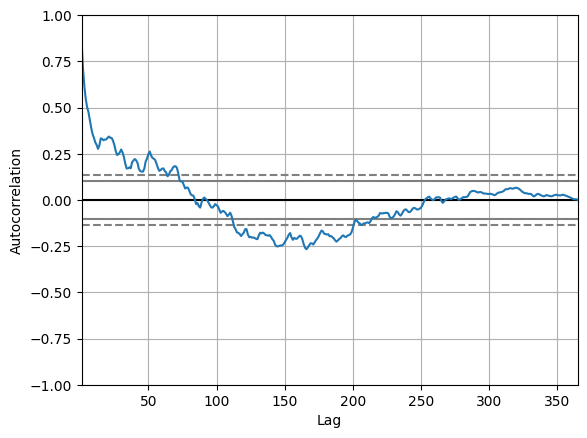

In [17]:
pd.plotting.autocorrelation_plot(data["Instagram reach"])

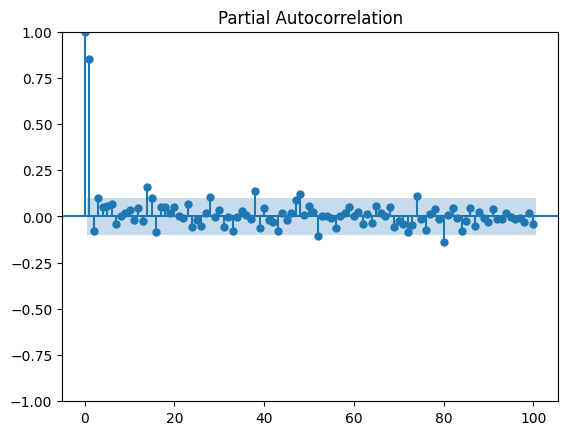

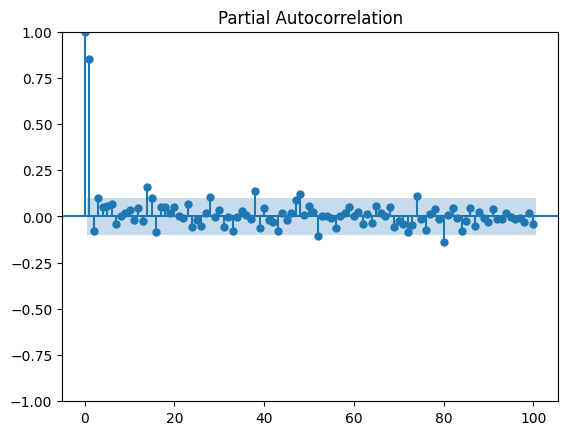

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Instagram reach"], lags = 100)

In [19]:
p, d, q = 8, 1, 2

import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Instagram reach'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

c:\python 3.12\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(8, 1, 2)x(8, 1, 2, 12)   Log Likelihood               -3938.513
Date:                            Fri, 12 Apr 2024   AIC                           7919.025
Time:                                    22:21:28   BIC                           8000.161
Sample:                                         0   HQIC                          7951.313
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1896      6.384      0.030      0.976     -12.323      12.702
ar.L2          0.4749      5.941   

In [20]:
predictions = model.predict(len(data), len(data)+100)

trace_train = go.Scatter(x=data.index, 
                         y=data["Instagram reach"], 
                         mode="lines", 
                         name="Training Data")
trace_pred = go.Scatter(x=predictions.index, 
                        y=predictions, 
                        mode="lines", 
                        name="Predictions")

layout = go.Layout(title="Instagram Reach Time Series and Predictions", 
                   xaxis_title="Date", 
                   yaxis_title="Instagram Reach")

fig = go.Figure(data=[trace_train, trace_pred], layout=layout)
fig.show()